In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
births=pd.read_csv(r'https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

In [58]:
births.head(),births.dropna()

(   year  month  day gender  births  decade
 0  1969      1  1.0      F    4046    1960
 1  1969      1  1.0      M    4440    1960
 2  1969      1  2.0      F    4454    1960
 3  1969      1  2.0      M    4548    1960
 4  1969      1  3.0      F    4548    1960,
        year  month   day gender  births  decade
 0      1969      1   1.0      F    4046    1960
 1      1969      1   1.0      M    4440    1960
 2      1969      1   2.0      F    4454    1960
 3      1969      1   2.0      M    4548    1960
 4      1969      1   3.0      F    4548    1960
 ...     ...    ...   ...    ...     ...     ...
 15062  1988     12  29.0      M    5944    1980
 15063  1988     12  30.0      F    5742    1980
 15064  1988     12  30.0      M    6095    1980
 15065  1988     12  31.0      F    4435    1980
 15066  1988     12  31.0      M    4698    1980
 
 [15067 rows x 6 columns])

In [29]:
births.groupby(['year','month']).mean().unstack().head()

day                                                       \
month        1          2         3          4         5          6    
year                                                                   
1969   18.59375  18.593750  18.59375  18.593750  18.59375  18.593750   
1970   18.59375  18.593750  18.59375  18.593750  18.59375  18.593750   
1971   18.59375  18.032787  18.59375  18.593750  18.59375  18.396825   
1972   18.59375  18.209677  18.59375  18.593750  18.59375  18.396825   
1973   18.59375  17.800000  18.59375  18.396825  18.59375  18.593750   

                                               ...       births               \
month        7         8         9         10  ...           3            4    
year                                           ...                             
1969   18.59375  18.59375  18.59375  18.59375  ...  4633.593750  4416.218750   
1970   18.59375  18.59375  18.59375  18.59375  ...  4803.875000  4485.781250   
1971   18.59375  18.59375  18.59375  18.59375  ...  4817.375000  4473.500000   
1972   18.59375  18.59375  18.59375  18.59375  ...  4275.703125  3985.546875   
1973   18.59375  18.59375  18.59375  18.59375  ...  4211.031250  3937.809524   

                                                                       \
month           5            6           7            8            9    
year                                                                    
1969   4517.562500  4556.406250  4974.31250  5016.156250  4884.687500   
1970   4658.437500  4740.281250  5163.31250  5176.968750  5195.250000   
1971   4451.968750  4532.031746  4773.96875  4892.531250  4867.718750   
1972   4223.109375  4130.619048  4347.93750  4508.906250  4423.062500   
1973   3988.546875  3981.234375  4311.46875  4409.203125  4243.828125   

                                              
month           10           11           12  
year                                          
1969   4874.562500  4641.468750  4914.406250  
1970   5069.093750  4837.562500  5151.218750  
1971   4738.250000  4402.531250  4475.156250  
1972   4310.984375  4135.453125  4329.921875  
1973   4162.750000  4012.380952  4083.937500  

[5 rows x 24 columns]

In [28]:
births.pivot_table('day',index='year',columns='month').head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1969,18.59375,18.593750,18.59375,18.593750,18.59375,18.593750,18.59375,18.59375,18.59375,18.59375,18.593750,18.59375
1970,18.59375,18.593750,18.59375,18.593750,18.59375,18.593750,18.59375,18.59375,18.59375,18.59375,18.593750,18.59375
1971,18.59375,18.032787,18.59375,18.593750,18.59375,18.396825,18.59375,18.59375,18.59375,18.59375,18.593750,18.59375
1972,18.59375,18.209677,18.59375,18.593750,18.59375,18.396825,18.59375,18.59375,18.59375,18.59375,18.593750,18.59375
1973,18.59375,17.800000,18.59375,18.396825,18.59375,18.593750,18.59375,18.59375,18.59375,18.59375,18.396825,18.59375


In [30]:
births['decade']=10*(births['year']//10)


In [31]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [45]:
births.pivot_table('births',columns='gender',index='decade',aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0,0.5,'Births')

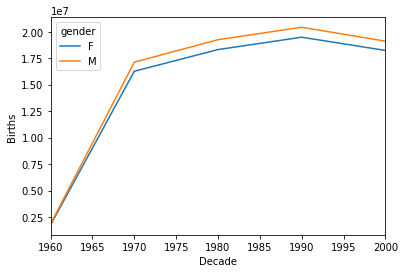

In [47]:
births.pivot_table('births',columns='gender',index='decade',aggfunc='sum').plot()
plt.xlabel('Decade')
plt.ylabel('Births')


Text(0,0.5,'Births')

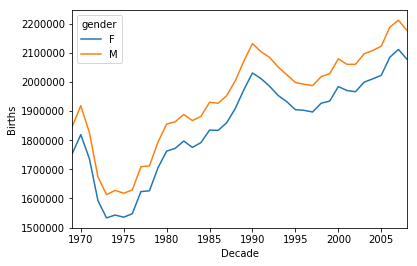

In [52]:
births.pivot_table('births',columns='gender',index='year',aggfunc='sum').plot()
plt.xlabel('Decade')
plt.ylabel('Births')

In [48]:
plt.legend?

In [49]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [50]:
quartiles

array([4358. , 4814. , 5289.5])

In [51]:
help(np.percentile)

Help on function percentile in module numpy:

percentile(a, q, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
    Compute the q-th percentile of the data along the specified axis.
    
    Returns the q-th percentile(s) of the array elements.
    
    Parameters
    ----------
    a : array_like
        Input array or object that can be converted to an array.
    q : array_like of float
        Percentile or sequence of percentiles to compute, which must be between
        0 and 100 inclusive.
    axis : {int, tuple of int, None}, optional
        Axis or axes along which the percentiles are computed. The
        default is to compute the percentile(s) along a flattened
        version of the array.
    
        .. versionchanged:: 1.9.0
            A tuple of axes is supported
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape and buffer length as the expected output,
     

In [69]:

births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [70]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

In [72]:
births.index = pd.to_datetime(10000 * births.year +
100 * births.month +
births.day, format='%Y%m%d')

In [73]:
births

,year,month,day,gender,births,decade
1969-01-01,1969,1,1,F,4046,1960
1969-01-01,1969,1,1,M,4440,1960
1969-01-02,1969,1,2,F,4454,1960
1969-01-02,1969,1,2,M,4548,1960
1969-01-03,1969,1,3,F,4548,1960
...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980
1988-12-30,1988,12,30,F,5742,1980
1988-12-30,1988,12,30,M,6095,1980
1988-12-31,1988,12,31,F,4435,1980


In [74]:
births['dayofweek'] = births.index.dayofweek

In [75]:
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


In [77]:
Month={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}

In [85]:
births['month'].apply(lambda x:Month[x])

1969-01-01     January
1969-01-01     January
1969-01-02     January
1969-01-02     January
1969-01-03     January
                ...   
1988-12-29    December
1988-12-30    December
1988-12-30    December
1988-12-31    December
1988-12-31    December
Name: month, Length: 14610, dtype: object

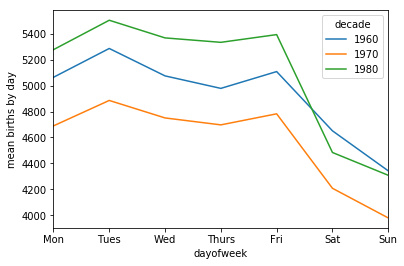

In [87]:
import matplotlib.pyplot as plt
import matplotlib as mpl
births.pivot_table('births', index='dayofweek',
columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [88]:
births_by_date=births.pivot_table('births',[births.index.month,births.index.day])

In [90]:
births_by_date.unstack()

births                                                              \
          1         2         3         4         5         6         7    
1   4009.225  4247.400  4500.900  4571.350  4603.625  4668.150  4706.925   
2   4661.450  4743.025  4761.825  4760.825  4728.300  4678.100  4649.650   
3   4742.175  4750.550  4871.775  4821.550  4781.600  4721.875  4722.450   
4   4623.825  4743.825  4652.925  4679.525  4586.825  4642.850  4689.850   
5   4651.275  4616.700  4570.225  4577.000  4687.300  4678.950  4658.950   
6   4751.475  4804.650  4783.275  4744.475  4706.875  4771.850  4681.050   
7   5021.975  5021.450  4869.425  4335.325  4698.825  4984.500  5153.425   
8   5068.000  5008.525  5065.250  5087.950  5108.000  5110.925  5082.675   
9   4908.325  4982.000  5003.925  5013.400  4954.600  4955.000  4995.450   
10  5167.325  5103.625  5067.375  5005.175  5025.075  5048.100  5024.100   
11  4729.800  4727.150  4821.775  4849.400  4808.075  4758.475  4783.175   
12  4836.500  4830.300  4758.500  4718.725  4734.675  4683.050  4704.325   

                                  ...                                          \
          8         9         10  ...        22        23        24        25   
1   4629.650  4537.775  4591.700  ...  4742.800  4666.750  4653.200  4698.000   
2   4668.525  4713.575  4800.850  ...  4751.525  4757.450  4829.000  4857.025   
3   4718.225  4692.075  4785.375  ...  4667.200  4697.200  4725.050  4773.650   
4   4712.025  4649.875  4610.675  ...  4686.700  4643.725  4581.150  4602.250   
5   4623.750  4608.850  4623.175  ...  4713.500  4721.100  4689.125  4661.925   
6   4681.950  4784.275  4831.375  ...  4795.625  4850.550  4897.525  4890.925   
7   5159.800  5075.400  5041.300  ...  5135.675  5092.275  5036.050  5029.325   
8   5153.575  5027.775  5083.375  ...  5058.850  5007.050  5035.200  5107.675   
9   5165.475  5263.400  5214.500  ...  5316.825  5320.425  5284.050  5240.000   
10  4989.875  4945.425  4975.975  ...  4810.250  4755.500  4758.775  4744.350   
11  4752.750  4784.125  4836.300  ...  4601.900  4650.650  4647.125  4649.800   
12  4803.800  4793.825  4785.325  ...  4661.925  4466.675  4126.250  3844.450   

                                                                
          26        27        28        29        30        31  
1   4715.900  4747.025  4771.800  4702.300  4644.225  4598.275  
2   4790.575  4693.750  4695.300  4623.400       NaN       NaN  
3   4722.825  4680.850  4694.650  4665.025  4663.425  4723.250  
4   4588.500  4571.950  4656.550  4613.250  4615.100       NaN  
5   4657.750  4738.150  4671.650  4704.050  4601.175  4597.050  
6   4853.975  4852.325  4862.975  4881.650  4981.600       NaN  
7   4998.700  5070.250  5133.525  5151.900  5101.225  5045.275  
8   5167.500  5124.700  5099.775  5062.000  5027.850  5048.650  
9   5250.650  5190.150  5168.450  5218.825  5224.775       NaN  
10  4788.050  4821.350  4826.100  4775.575  4745.050  4662.800  
11  4587.250  4511.550  4590.775  4676.725  4765.475       NaN  
12  4383.525  4850.150  5044.200  5120.150  5172.350  4859.200  

[12 rows x 31 columns]

In [91]:
births_by_date.index=[pd.datetime(2012,month,day) for (month,day) in births_by_date.index]

In [92]:
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


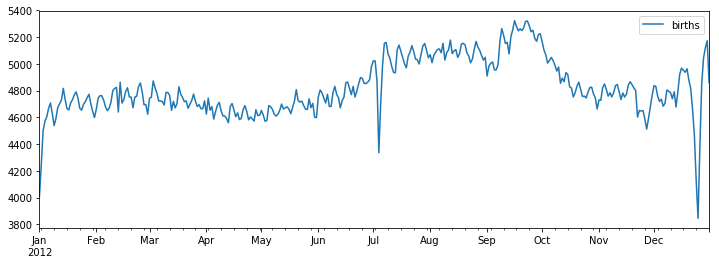

In [93]:
fig,ax=plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax);

## Vectorized String Operations

In [94]:
x=np.array([2,3,4,6,12,13])
x

array([ 2,  3,  4,  6, 12, 13])

In [98]:
x**2

array([  4,   9,  16,  36, 144, 169], dtype=int32)

In [99]:
data=['peter','Paul','Mary','gUIDO']

In [100]:
data

['peter', 'Paul', 'Mary', 'gUIDO']

In [120]:
[i.capitalize() for i in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [121]:
[i.lower() for i in data]

['peter', 'paul', 'mary', 'guido']

In [122]:
[i.upper() for i in data]

['PETER', 'PAUL', 'MARY', 'GUIDO']

In [123]:
names=pd.Series(data)

In [125]:
names.str.capitalize()

0    Peter
1     Paul
2     Mary
3    Guido
dtype: object

### Methods similar to Python string methods
#### len() lower() translate() islower()
#### ljust() upper() startswith() isupper()
#### rjust() find() endswith() isnumeric()
#### center() rfind() isalnum() isdecimal()
#### zfill() index() isalpha() split()
#### strip() rindex() isdigit() rsplit()
#### rstrip() capitalize() isspace() partition()
#### lstrip() swapcase() istitle() rpartition()

In [145]:
def Regex(txt):
    txt=re.match('^g',txt).string
    return txt

In [142]:
data

['peter', 'Paul', 'Mary', 'gUIDO']

In [160]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [165]:
monte.str.capitalize()

0    Graham chapman
1       John cleese
2     Terry gilliam
3         Eric idle
4       Terry jones
5     Michael palin
dtype: object

In [172]:

{i:len(i) for i in monte}

{'Eric Idle': 9,
 'Graham Chapman': 14,
 'John Cleese': 11,
 'Michael Palin': 13,
 'Terry Gilliam': 13,
 'Terry Jones': 11}

In [173]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

#### match() Call re.match() on each element, returning a Boolean.
#### extract() Call re.match() on each element, returning matched groups as strings.
#### findall() Call re.findall() on each element.
#### replace() Replace occurrences of pattern with some other string.
#### contains() Call re.search() on each element, returning a Boolean.
#### count() Count occurrences of pattern.
#### split() Equivalent to str.split(), but accepts regexps.
#### rsplit() Equivalent to str.rsplit(), but accepts regexps.

In [179]:
monte[monte.str.contains('ha')]

0    Graham Chapman
5     Michael Palin
dtype: object

#### get() Index each element
#### slice() Slice each element
#### slice_replace() Replace slice in each element with passed value
#### cat() Concatenate strings
#### repeat() Repeat values
#### normalize() Return Unicode form of string
#### pad() Add whitespace to left, right, or both sides of strings
#### wrap() Split long strings into lines with length less than a given width
#### join() Join strings in each element of the Series with passed separator
#### get_dummies() Extract dummy variables as a DataFrame

In [213]:
full_monte = pd.DataFrame({'name': monte,
'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C',
'B|C|D']})

In [214]:
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


#### The get_dummies() routine lets you quickly split out these indicator variables into a

In [216]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


### get_dummies() function

#### The get_dummies() function is used to convert categorical variable into dummy variable

In [1]:
import numpy as np
import pandas as pd
s=pd.Series(list('pqrs'))

In [2]:
s


0    p
1    q
2    r
3    s
dtype: object

In [3]:
pd.get_dummies(s)

,p,q,r,s
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


In [5]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [6]:
full_monte = pd.DataFrame({'name': monte,
'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C',
'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [24]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


In [25]:
a=['Orange', 'Banana','Mango']
b=['Man','Alien','Human']
c=['Cat','Tiger','Python']

In [27]:
per=[[i,j,k] for i in a for j in b for k in c    ]

In [29]:
per

[['Orange', 'Man', 'Cat'],
 ['Orange', 'Man', 'Tiger'],
 ['Orange', 'Man', 'Python'],
 ['Orange', 'Alien', 'Cat'],
 ['Orange', 'Alien', 'Tiger'],
 ['Orange', 'Alien', 'Python'],
 ['Orange', 'Human', 'Cat'],
 ['Orange', 'Human', 'Tiger'],
 ['Orange', 'Human', 'Python'],
 ['Banana', 'Man', 'Cat'],
 ['Banana', 'Man', 'Tiger'],
 ['Banana', 'Man', 'Python'],
 ['Banana', 'Alien', 'Cat'],
 ['Banana', 'Alien', 'Tiger'],
 ['Banana', 'Alien', 'Python'],
 ['Banana', 'Human', 'Cat'],
 ['Banana', 'Human', 'Tiger'],
 ['Banana', 'Human', 'Python'],
 ['Mango', 'Man', 'Cat'],
 ['Mango', 'Man', 'Tiger'],
 ['Mango', 'Man', 'Python'],
 ['Mango', 'Alien', 'Cat'],
 ['Mango', 'Alien', 'Tiger'],
 ['Mango', 'Alien', 'Python'],
 ['Mango', 'Human', 'Cat'],
 ['Mango', 'Human', 'Tiger'],
 ['Mango', 'Human', 'Python']]